# Dijkstra

> Given a weighted graph and a source vertex in the graph, find the shortest paths from the source to all the other vertices in the given graph.

For video reference --> https://www.youtube.com/watch?v=_lHSawdgXpI

In [260]:
import math

def dijkstra(graph: list, nodes: int, start_node: int) -> list:
    costs = [math.inf] * nodes
    visited = [False] * nodes
    queue = []

    visited[start_node] = True
    costs[start_node] = 0

    queue.append((start_node, 0))

    while len(queue) > 0:
        queue.sort(key=lambda item: item[1], reverse=True)

        curr_node, curr_cost = queue.pop()
        visited[curr_node] = True

        curr_paths = [path for path in graph if path[0] == curr_node]
        for _, next_node, next_cost in curr_paths:
            if visited[next_node]:
                continue

            new_cost = next_cost + curr_cost
            if new_cost < costs[next_node]:
                costs[next_node] = new_cost
                queue.append((next_node, new_cost))

    return (costs)


graph = [
    [0, 1, 4],
    [0, 2, 1],

    [1, 3, 1],

    [2, 1, 2],
    [2, 3, 5],
    
    [3, 4, 3],
]

# graph = [
#     [0, 1, 5],
#     [0, 2, 1],
    
#     [1, 2, 2],
#     [1, 3, 3],
#     [1, 4, 20],

#     [2, 1, 3],
#     [2, 4, 12],
    
#     [3, 2, 3],
#     [3, 4, 2],
#     [3, 5, 6],
    
#     [4, 5, 1],
# ]

nodes = len({node[0] for node in graph} | {node[1] for node in graph})
start_node = 0

res = dijkstra(graph, nodes, start_node)
print(res)

[0, 3, 1, 4, 7]


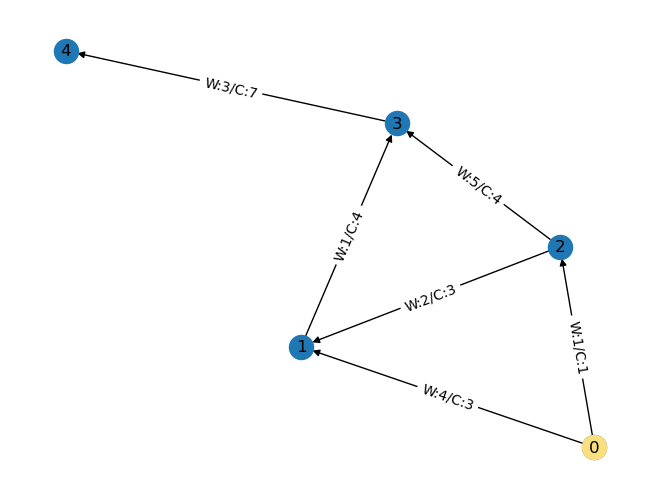

In [261]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(graph: list, costs: list, start_node: int):
    """
    Takes the whole graph to draw and the selected connections by index
    """
    # Create a graph
    G = nx.DiGraph()

    # extract list of nodes based on the connections and merge from and to into a single set
    nodes = {node[0] for node in graph} | {node[1] for node in graph}

    # Add nodes to the graph
    for node in nodes:      
      G.add_node(node)

    # Add connections to the graph
    for from_node, to_node, weight in graph:
        G.add_edge(from_node, to_node, weight=weight, cost=costs[to_node])

    # Calculate positions for nodes
    pos = nx.spring_layout(G)

    nx.draw(G, pos, with_labels=True)  # draw nodes, labels, and edges
    
    edge_labels = {}
    for u, v, attributes in G.edges(data=True):
      weight = attributes['weight']
      cost = attributes['cost']
      edge_labels[(u,v)] = f'W:{weight}/C:{cost}'
      
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    nx.draw_networkx_nodes(G, pos, nodelist=[start_node], node_color='#FADF7F')

    plt.show()

draw_graph(graph, res, start_node)